## Abstraction

### agent environment and goal
chek [README.md-Introduction](https://github.com/JiaRuiming-1/deep-reinforcement-learning/blob/master/p3_collab-compet/README.md)

### Multi-Agent Deep Deterministic Policy Gradient (MADDPG)
   The original [DDPG](https://arxiv.org/pdf/1509.02971.pdf) algorithm from which I extended to create the MADDPG version.In this paper, the authors present "a model-free, off-policy actor-critic algorithm using deep function approximators that can learn policies in high-dimensional, continuous action spaces." They highlight that DDPG can be viewed as an extension of Deep Q-learning to continuous tasks.
   
   Then, to make this algorithm suitable for the multiple agents in the Tennis environment, I implemented components discussed in [this paper](https://proceedings.neurips.cc/paper/2017/file/68a9750337a418a86fe06c1991a1d64c-Paper.pdf), Multi-Agent Actor-Critic for Mixed Cooperative-Competitive Environments.I implemented their variation of the actor-critic method.

## Learning Alogorithm - MADDPG
Just two different from DDPG:
- Multi-agents share common experience replay-buffer.
- Each Actor part of agent input only by its own observation. 
- Each Critic part of agent input by all observations and actions to calculate Q value
- Every train batch update one agent model that others keep their own action and obervation as before.

<img src=images/multi-agent-actor-critic.png alt="Drawing" style="width: 500px;" align="left"/>



### Improve method
1. In this environment, agents train from 14-1000 steps, and it is not converage fast. So we can add lager noise to actions at prior train stage and reduce it slowly.

2. Use loss value as a priority in replay buffer to calculate probability to pick and train. As Rainbow method I used in Banana project before, we can use segment tree to implement that.

## Model :
    Actor-Critic Model

###  Actor Model: 

- Fully connected layer - input: 24 (state size) output: 128
- Fully connected layer - input: 256 output 128
- Fully connected layer - input: 256 output: 2 (action size)

### Critic Model
- Fully connected layer - input: 24 * num_agent (state size) output: 256
- Fully connected layer - input: 256+(all action size) output 256
- Fully connected layer - input: 256 output: 1 


## Hyper Parameters:

<table width=600>
<tr><td>Memory buffer size  </td><td> 1e6    </td></tr>     
<tr><td>Batch size </td><td>  512   </td></tr>
<tr><td>Gamma  </td><td> 0.99    </td></tr>
<tr><td>Actor LR  </td><td> 1e-3   </td></tr>
<tr><td>Critic LR  </td><td> 1e-3   </td></tr>
<tr><td>Actor Model  </td><td> Adam optimizer   </td></tr>
<tr><td>Critic Model  </td><td>  Adam optimizer    </td></tr>     
<tr><td>Tau (soft update)  </td><td> 5e-3          </td></tr>           
<tr><td>Learn_every  </td><td> 10    </td></tr>
<tr><td>Learn_num  </td><td> 10    </td></tr>
<tr><td>OU_SIGMA </td><td> 0.2   </td></tr>
<tr><td>OU_THETA </td><td> 0.15   </td></tr>
<tr><td>EPS_START </td><td> 2.0   </td></tr>
<tr><td>EPS_DECAY </td><td> 0.996   </td></tr>
</table>

## Plot Result 

### all agents run on CPU 
   From 'Tennis.ipynb' juypter notebook ,Environment run by cpu and solved at 612 episodes. Last 100 episodes average score for each agent: 0.505. Indeep agent reached the top score close 700 episodes and cost almost 30minutes.
   
   The second and third picture shows actor and critic model loss value by each episode.

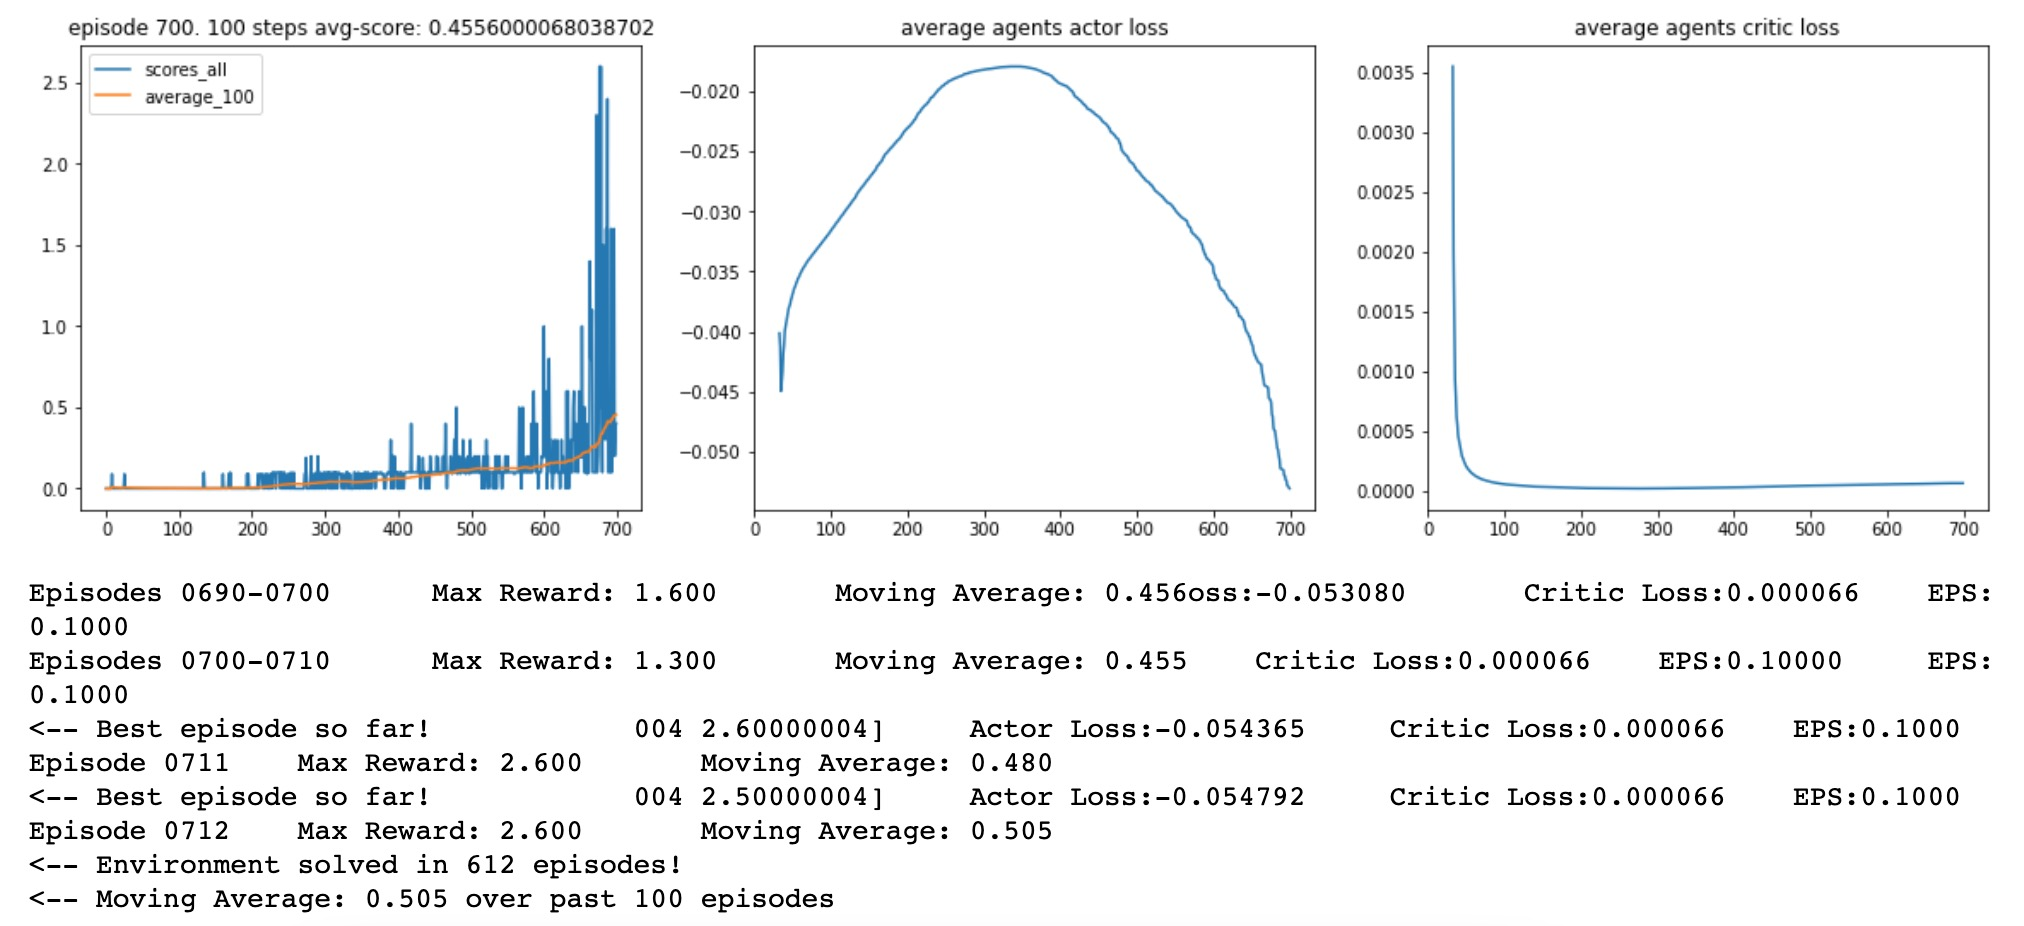

## Future work and improvement

1. Attempt to use PPO and Multi-Agent Actor-Critic for Mixed Cooperative-Competitive Environments methods to solve this task.
2. Attempt to solve optional task.

## Reference
[Multi-Agent Actor-Critic for Mixed Cooperative-Competitive Environments](https://proceedings.neurips.cc/paper/2017/file/68a9750337a418a86fe06c1991a1d64c-Paper.pdf)

[CONTINUOUS CONTROL WITH DEEP REINFORCEMENT LEARNING](https://arxiv.org/pdf/1509.02971.pdf)